In [24]:
# Load Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from wordcloud import wordcloud, STOPWORDS, WordCloud
from bs4 import BeautifulSoup
import requests
import re

In [2]:
# Collecting BA Review Data from the Skytrax Website Using libraries such as BeautifulSoup & requests for data scraping

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [34]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Straightforward check in T...
1,Not Verified | I am beyond upset and disgusted...
2,✅ Trip Verified | I purchased round trip dir...
3,Not Verified | I booked two business class sea...
4,Not Verified | Although all four flights were ...


In [36]:
# df.to_csv("BA_reviews_version.csv")

In [5]:
# Data Cleaning: Now that we have Our BA Review Data, it will need to be cleaned:

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Remove the unnecessary index column
#df = df.drop(columns=['Unnamed: 0'])

# Function to clean the text
def clean_text(text):
    # Remove special characters, emojis, and extra spaces
    text = re.sub(r'\✅|\|', '', text)
    text = re.sub(r'\s+', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Normalize specific words/phrases
    text = re.sub(r'\bflights?\b', 'flight', text)
    text = re.sub(r'\bba\b|\bbritish airway\b|\bbritish airways\b', 'britishairways', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(["old", "u", "dont", "next", "got", "really", "use", "the", "and", "to", "of", "a", "in", "that",
                       "see", "going", "verified", "on", "for", "was", "on", "with", "as", "at", "this", "but", "by", 
                       "from", "verified", "trip", "even", "good", "go", "said", "know", "know", "went", "rather",
                       "want", "due", "wife", "called", "couldnt", "say", "still", "didnt",
                       "told", "like"])  # Add any other non-meaningful words here
    
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the cleaning function to the reviews
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

# Display the first few cleaned reviews
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Charles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews,cleaned_reviews
0,✅ Trip Verified | Straightforward check in T...,straightforward check new site club check work...
1,Not Verified | I am beyond upset and disgusted...,beyond upset disgusted disregard lack knowledg...
2,✅ Trip Verified | I purchased round trip dir...,purchased round direct flight business class t...
3,Not Verified | I booked two business class sea...,booked two business class seats medical emerge...
4,Not Verified | Although all four flights were ...,although four flight delayed service offered b...


### What is Sentiment Analysis: 

Sentiment analysis is a natural language processing technique that gauges the emotional tone of text, categorizing it broadly into positive, negative, or neutral sentiments.  As you described, it's about understanding the emotion behind the text - is it happy, sad, angry, etc.?

In [10]:
# Sentiment Analysis: Analyze the sentiment of the reviews to understand the overall customer perception Using TextBlob

from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the cleaned reviews
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# Categorize sentiment into positive, neutral, or negative
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the first few rows
df.head()

,reviews,cleaned_reviews,sentiment,sentiment_category
0,✅ Trip Verified | Straightforward check in T...,straightforward check new site club check work...,0.164470,positive
1,Not Verified | I am beyond upset and disgusted...,beyond upset disgusted disregard lack knowledg...,-0.030076,negative
2,✅ Trip Verified | I purchased round trip dir...,purchased round direct flight business class t...,0.070000,positive
3,Not Verified | I booked two business class sea...,booked two business class seats medical emerge...,0.083333,positive
4,Not Verified | Although all four flights were ...,although four flight delayed service offered b...,0.291667,positive


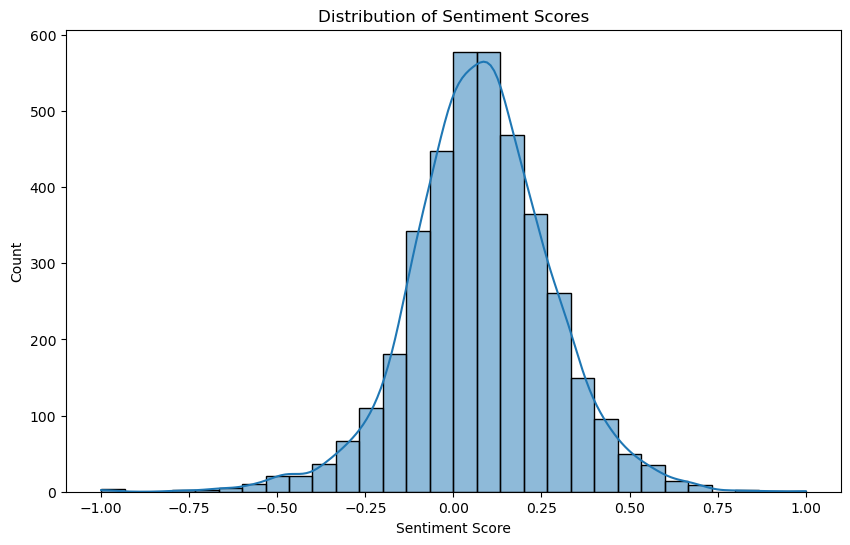

In [9]:
# Display sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

In [14]:
# Calculate value counts
value_counts = df['sentiment_category'].value_counts()

# Calculate the percentage of each sentiment category
percentage_value_counts = df['sentiment_category'].value_counts(normalize=True) * 100

# Combine value counts and percentage value counts
summary = pd.concat([value_counts, percentage_value_counts], axis=1, keys=['Count', 'Percentage'])

# Sort by Count in descending order
summary = summary.sort_values('Count', ascending=False)

# Reset index to make 'sentiment' a column
summary = summary.reset_index()

print(tabulate(summary, headers="firstrow", tablefmt="fancy_grid", index=False))

,sentiment_category,Count,Percentage
0,positive,2568,66.649364
1,negative,1247,32.364391
2,neutral,38,0.986244


In [33]:
print(tabulate(summary, headers="firstrow", tablefmt="fancy_grid"))

╒═════╤════════════╤════════╤═════════════════════╕
│   0 │ positive   │   2568 │   66.64936413184532 │
╞═════╪════════════╪════════╪═════════════════════╡
│   1 │ negative   │   1247 │           32.3644   │
├─────┼────────────┼────────┼─────────────────────┤
│   2 │ neutral    │     38 │            0.986244 │
╘═════╧════════════╧════════╧═════════════════════╛


### Topic Modeling: 

It's about understanding the subject of the text - what are customers talking about? Is it about customer service, flight delays, the in-flight experience, etc.?

In [77]:
# Topic Modeling: Identifying Common Themes or Topics Within the Text Reviews Dataset Using Latent Dirichlet Allocation LDA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned review text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_reviews'])

# Perform LDA (Latent Dirichlet Allocation) for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extract the topics and the top words associated with each topic
topic_words = {}
for i, topic in enumerate(lda.components_):
    topic_words[i] = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]

# Convert the topic words into a DataFrame for display
topics_df = pd.DataFrame(topic_words)
topics_df.columns = [f"Topic {i+1}" for i in range(5)]

topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,time,seats,airport,staff,minutes
1,club,food,staff,economy,service
2,seats,cabin,booked,london,cabin
3,cabin,economy,airline,service,london
4,service,service,hours,seat,heathrow
5,crew,business,customer,flight,boarding
6,seat,seat,london,seats,crew
7,britishairways,class,service,business,time
8,food,flight,britishairways,class,britishairways
9,flight,britishairways,flight,britishairways,flight


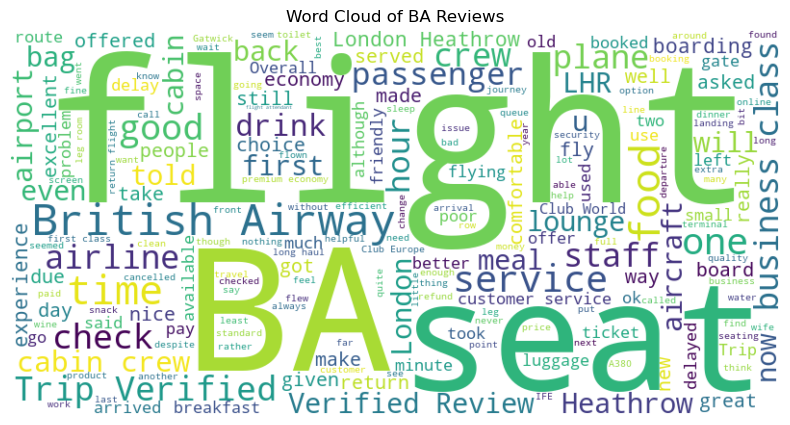

Word Cloud Generated


In [15]:
# Create a word cloud of customers reviews (before cleaning)
text = ' '.join(df['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of BA Reviews')
plt.show()

print("Word Cloud Generated")

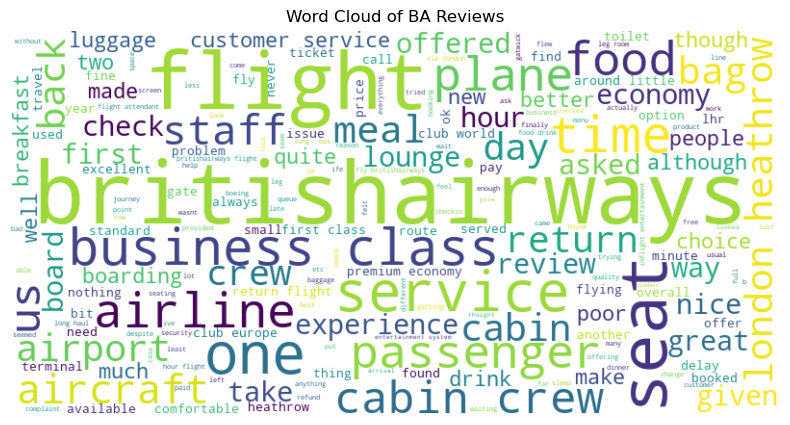

Word Cloud Generated


In [22]:
# Create a word cloud of customers reviews 

# Additional stopwords to remove common or non-meaningful words
custom_stopwords = STOPWORDS

custom_stopwords.update(["old", "u", "dont", "next", "got", "really", "use", "the", "and", "to", "of", "a", "in", "that",
                         "see", "going", "verified", "on", "for", "was", "on", "with", "as", "at", "this", "but", "by", 
                         "from", "verified", "trip", "even", "good", "go", "said", "know", "know", "went", "rather",
                         "want", "due", "wife", "called", "couldnt", "say", "still", "didnt",
                         "told", "like"])  # Add any other non-meaningful words here

text = ' '.join(df['cleaned_reviews'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of BA Reviews')
plt.show()

print("Word Cloud Generated")